In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear regression using the Normal Equation

In [2]:
np.random.seed(42)

import numpy as np

X = 2 * np.random.rand(100, 1)
y0 = 4 + 3 * X + 0*np.random.randn(100, 1)
np.random.seed(42)
y = 4 + 3 * X + np.random.randn(100, 1)
np.random.seed(42)
y2 = 4 + 3 * X + 2*np.random.randn(100, 1)
np.random.seed(42)
y3 = 4 + 3 * X + 3*np.random.randn(100, 1)
np.random.seed(42)
y4 = 4 + 3 * X + 4*np.random.randn(100, 1)
np.random.seed(42)
y5 = 4 + 3 * X + 5*np.random.randn(100, 1)

Saving figure generated_data_plot


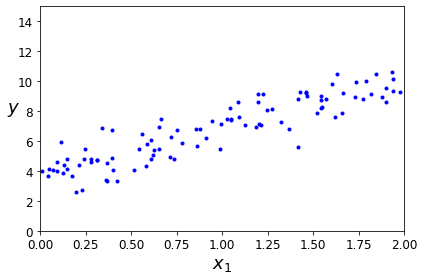

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [4]:
#Theta for variance 0,1,2,3,4,5
theta_0_best = []
theta_1_best = []
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

theta_best0 = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y0)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best2 = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y2)
theta_best3 = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y3)
theta_best4 = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y4)
theta_best5 = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y5)


In [5]:
theta_best0

array([[4.],
       [3.]])

In [6]:
theta_best

array([[3.70655768],
       [3.20162012]])

In [7]:
theta_best2

array([[3.41311537],
       [3.40324025]])

In [8]:
theta_best3

array([[3.11967305],
       [3.60486037]])

In [9]:
theta_best4

array([[2.82623073],
       [3.80648049]])

In [10]:
theta_best5

array([[2.53278842],
       [4.00810062]])

In [11]:
theta_0_best.append(theta_best0[0])
theta_1_best.append(theta_best0[1])

theta_0_best.append(theta_best[0])
theta_1_best.append(theta_best[1])

theta_0_best.append(theta_best2[0])
theta_1_best.append(theta_best2[1])

theta_0_best.append(theta_best3[0])
theta_1_best.append(theta_best3[1])

theta_0_best.append(theta_best4[0])
theta_1_best.append(theta_best4[1])

theta_0_best.append(theta_best5[0])
theta_1_best.append(theta_best5[1])

Which one has better performance?<br>
We are increasing noise so our theta value is moving away from the real value. Noise of measurement is much smaller or accurate when its low or 0 comapred to the other numbers. Variance is a percent so the variance with noise 0 gives the best theta


In [12]:
theta_0_best

[array([4.]),
 array([3.70655768]),
 array([3.41311537]),
 array([3.11967305]),
 array([2.82623073]),
 array([2.53278842])]

In [13]:
theta_1_best

[array([3.]),
 array([3.20162012]),
 array([3.40324025]),
 array([3.60486037]),
 array([3.80648049]),
 array([4.00810062])]

In [14]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.70655768],
       [10.10979793]])

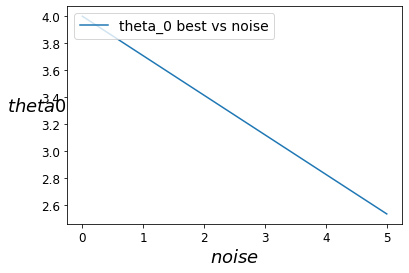

In [15]:
#theta_0 best against noise, x is noise and y is theta_0 best
x_axis = [0,1,2,3,4,5]
y_axis = theta_0_best
plt.plot(x_axis, y_axis,label="theta_0 best vs noise")
plt.xlabel("$noise$", fontsize=18)
plt.ylabel("$theta0$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

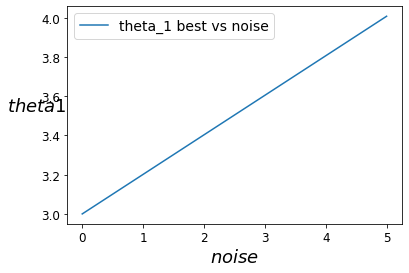

In [16]:
#theta_0 best against noise, x is noise and y is theta_0 best
x_axis = [0,1,2,3,4,5]
y_axis = theta_1_best
plt.plot(x_axis, y_axis, label="theta_1 best vs noise")
plt.xlabel("$noise$", fontsize=18)
plt.ylabel("$theta1$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

Explain in detail the observation. <br>
  Variance of noise is increasing for theta0 and theta1. It is moving away from our actual value which is for thetha0 is 4 and for thetha1 is 3, as we can see from the plots as we increase noise the values are moving away, the value is decreasing for theta0 and theta1 its increasing. The graph shows the best results when the noise is 0. Lower the noise percent the better. When we do 1 it means it shows 10 percent of noise, 2 gives 20 percent and so on. So, by having 0 we have 0% of noise. 

# Linear regression using batch gradient descent

In [17]:
np.random.seed(42)
theta_0_01 = []
theta_1_01 = []
iterations_list = []

eta = 0.01  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) 
for iteration in range(10, n_iterations, 10):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_0_01.append(theta[0])
    theta_1_01.append(theta[1])
    iterations_list.append(iteration)

    

np.random.seed(42)
theta_0_05 = []
theta_1_05 = []

eta = 0.05  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  
for iteration in range(10, n_iterations, 10):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_0_05.append(theta[0])
    theta_1_05.append(theta[1])
    

np.random.seed(42)
theta_0_1 = []
theta_1_1 = []

eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) 
for iteration in range(10, n_iterations, 10):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_0_1.append(theta[0])
    theta_1_1.append(theta[1])


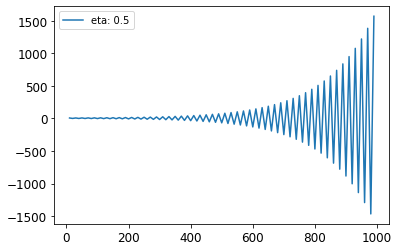

In [18]:
    
np.random.seed(42)
theta_0_5 = []
theta_1_5 = []

eta = 0.5  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) 
for iteration in range(10, n_iterations, 10):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_0_5.append(theta[0])
    theta_1_5.append(theta[1])
plt.plot(iterations_list, theta_0_5, label = "eta: 0.5")
plt.legend(loc="upper left")
#plt.axis([0, 1000, 0, 4])

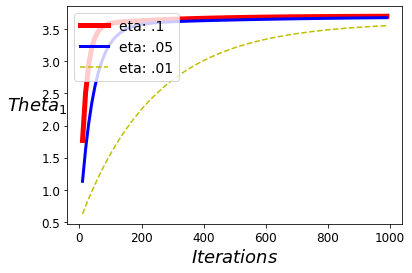

In [19]:
#theta_0 against iterations, x is iterations and y is theta_0

plt.plot(iterations_list, theta_0_1, "r", linewidth=5, label="eta: .1")
plt.plot(iterations_list, theta_0_05,"b", linewidth=3, label="eta: .05")
plt.plot(iterations_list, theta_0_01,"y--", label="eta: .01")
#plt.plot(iterations_list, theta_0_5, "g", label="eta: .5")
plt.xlabel("$Iterations$", fontsize=18)
plt.ylabel("$Theta_1$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

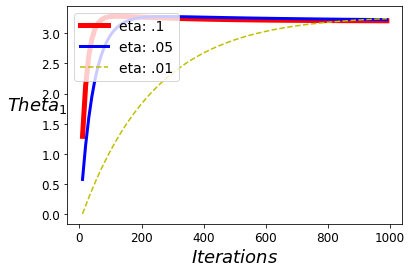

In [20]:
#theta_1 against iterations, x is iterations and y is theta_1

plt.plot(iterations_list, theta_1_1, "r", linewidth=5, label="eta: .1")
plt.plot(iterations_list, theta_1_05,"b", linewidth=3, label="eta: .05")
plt.plot(iterations_list, theta_1_01,"y--", label="eta: .01")
#plt.plot(iterations_list, theta_1_5, "g", label="eta: .5")
plt.xlabel("$Iterations$", fontsize=18)
plt.ylabel("$Theta_1$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

Explain in detail the trend in the plots. Which one is better and why? <br>

Around 50 iterations we start seeing a plateau and we see its enough. High values of eta are bad values because values around 10^-3 are considered good starting learning rates for eta. Not too many iterations are needed, model learned better with jump for eta. The eta for 0.5 is so bad and its totally random, there are random jumps. No improvements.
Also we can notice that cost reduces faster initially and then slows down. Getting closer to the optimal solution faster in eta of .1 and .05. With small learning rates it takes long to converge to the solution whereas with with larger learning rates it is quicker.

# Mini-batch gradient descent

In [21]:
iterations = 100
theta_0_1 = []
theta_1_1 = []
iterations_list = []
minibatch_size = 1

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
    theta_0_1.append(theta[0])
    theta_1_1.append(theta[1])   
    iterations_list.append(epoch)

In [22]:
minibatch_size = 10
theta_0_10 = []
theta_1_10 = []
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
    theta_0_10.append(theta[0])
    theta_1_10.append(theta[1])

In [23]:
minibatch_size = 20
theta_0_20 = []
theta_1_20 = []

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
    theta_0_20.append(theta[0])
    theta_1_20.append(theta[1])

In [24]:
minibatch_size = 30
theta_0_30 = []
theta_1_30 = []

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
    theta_0_30.append(theta[0])
    theta_1_30.append(theta[1])

In [25]:
minibatch_size = 50
theta_0_50 = []
theta_1_50 = []

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
    theta_0_50.append(theta[0])
    theta_1_50.append(theta[1])

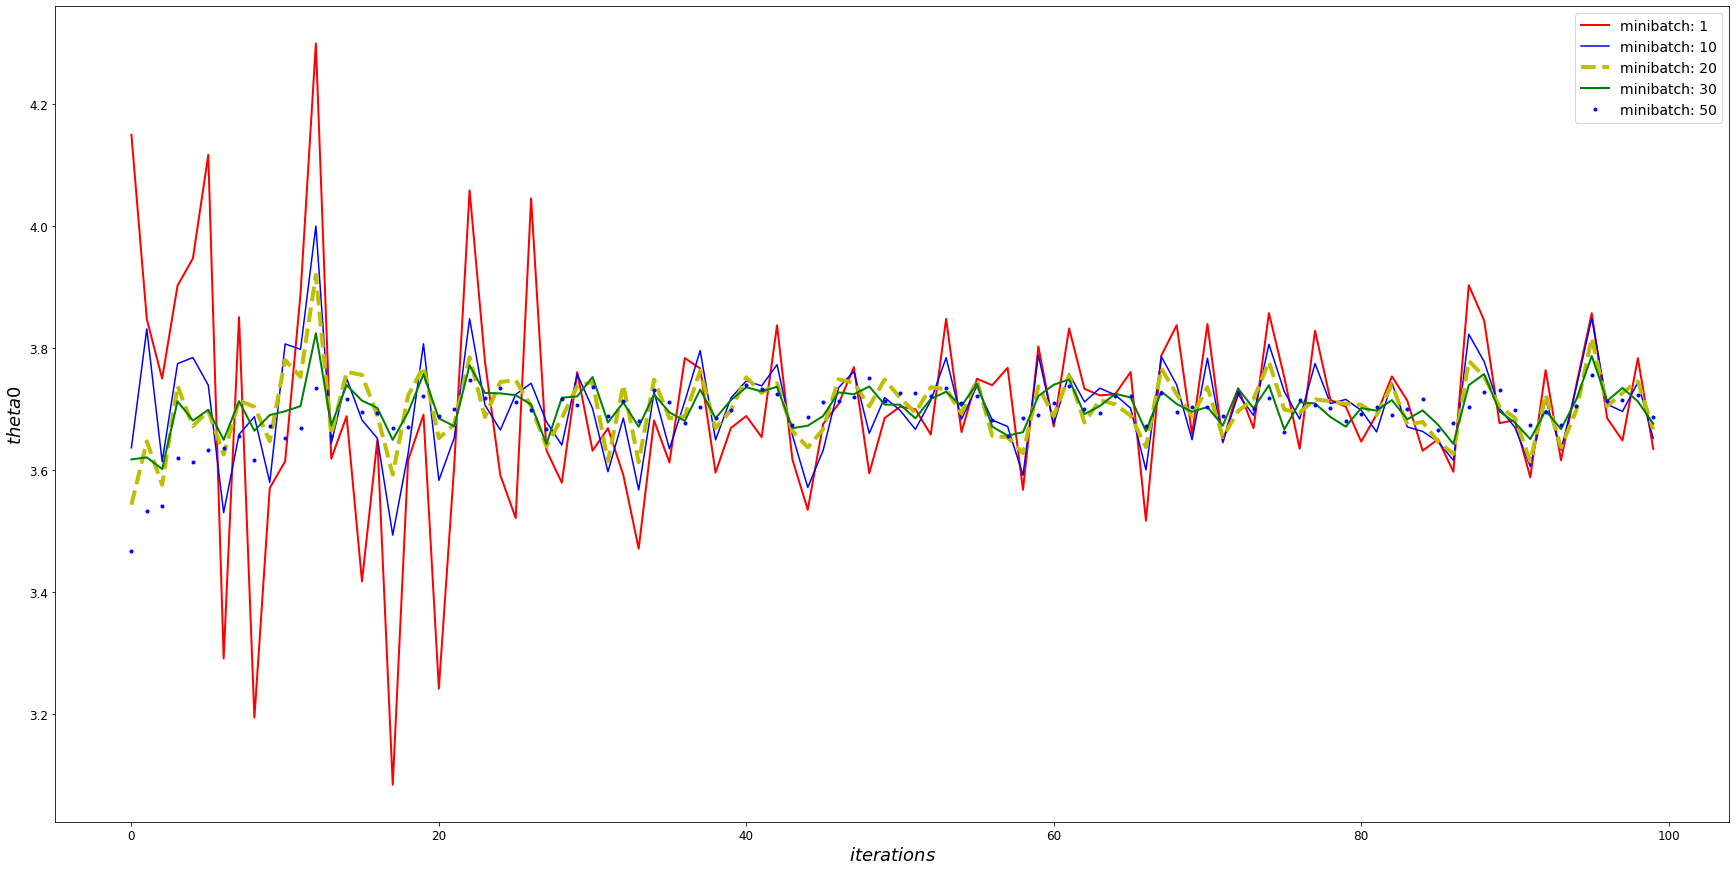

In [26]:
#theta_0 against iterations, x is iterations and y is theta_1

plt.figure(figsize=(30, 15))
plt.plot(iterations_list, theta_0_1, "r", linewidth=2, label="minibatch: 1")
plt.plot(iterations_list, theta_0_10,"b",  label="minibatch: 10")
plt.plot(iterations_list, theta_0_20,"y--",linewidth=4, label="minibatch: 20")
plt.plot(iterations_list, theta_0_30,"g",linewidth=2,label="minibatch: 30")
plt.plot(iterations_list, theta_0_50,"b.", linewidth = 6, label="minibatch: 50")
plt.xlabel("$iterations$", fontsize=18)
plt.ylabel("$theta0$", fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()


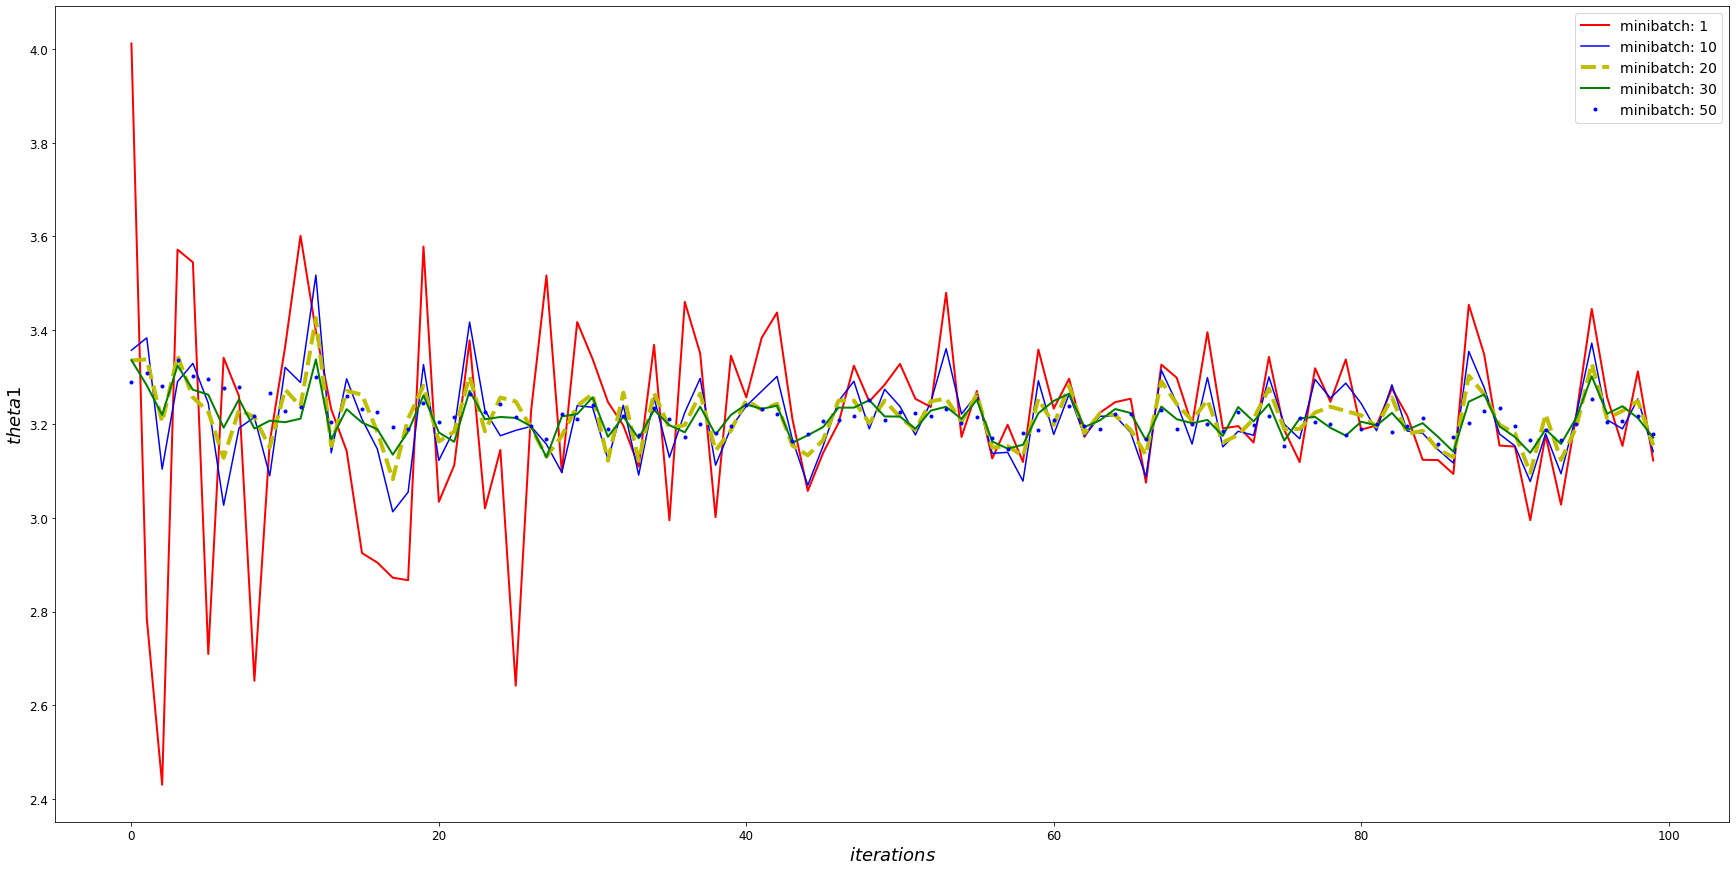

In [27]:
#theta_1 against iterations, x is iterations and y is theta_1

plt.figure(figsize=(30, 15))
plt.plot(iterations_list, theta_1_1, "r", linewidth=2, label="minibatch: 1")
plt.plot(iterations_list, theta_1_10,"b",  label="minibatch: 10")
plt.plot(iterations_list, theta_1_20,"y--",linewidth=4, label="minibatch: 20")
plt.plot(iterations_list, theta_1_30,"g",linewidth=2,label="minibatch: 30")
plt.plot(iterations_list, theta_1_50,"b.", linewidth = 6, label="minibatch: 50")
plt.xlabel("$iterations$", fontsize=18)
plt.ylabel("$theta1$", fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()



Explain in detail the trend in the plots. Which one is better and why? <br>
In mini-batch gradient descent, the algorithms progress in space is less erratic when the batch size increases.In theta1, for size 1 and 10 it is doing random jumps which is not good. Minibatch of size 30 and 50 are less erratic and closer to the actual value of size 3 of theta1.
For theta0, mini batch 1 is very erratic but shows values closer to the actual values in the starting itetations less than 50. As we go higher in batch sizes the values are becoming more stable. 
